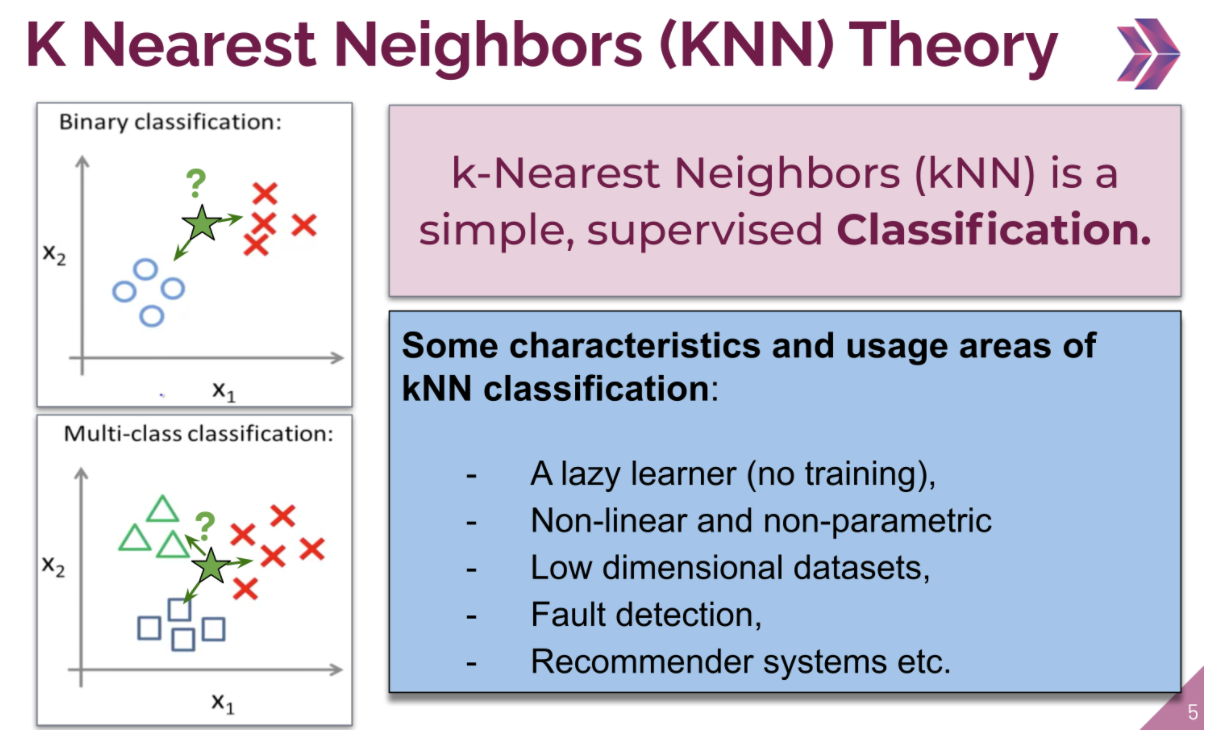

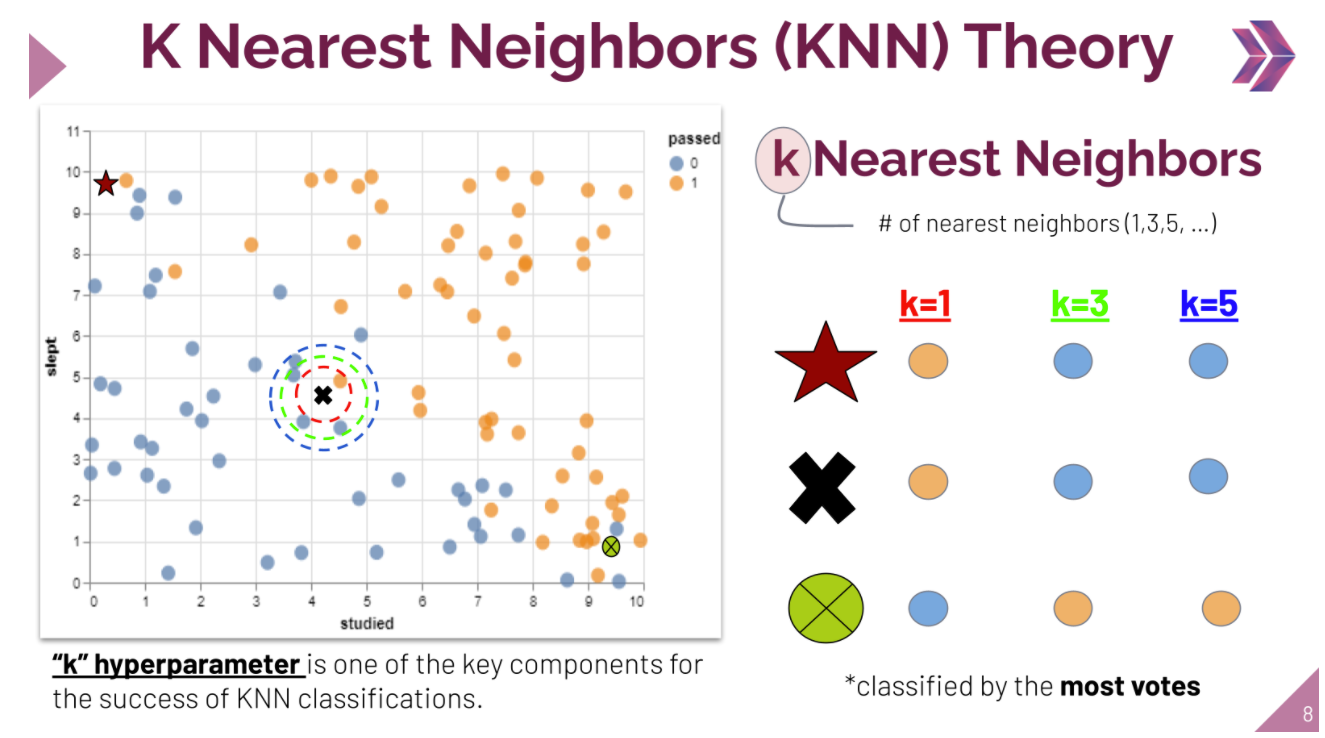

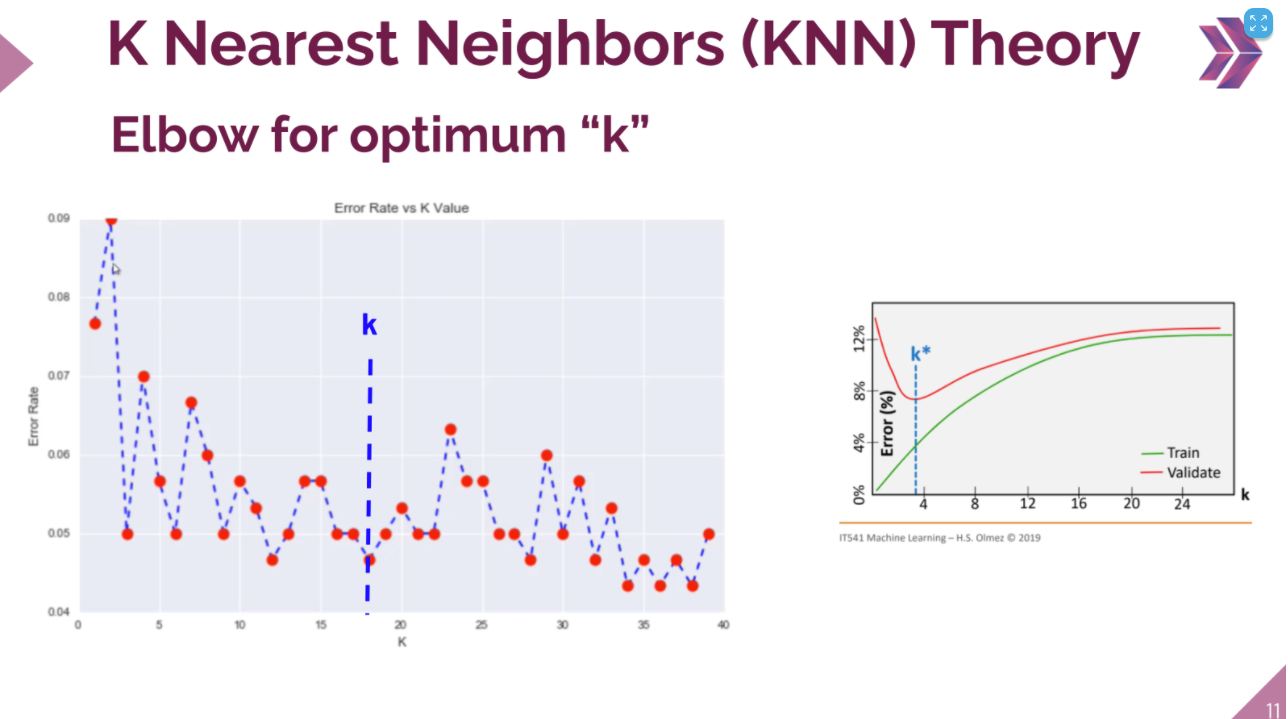

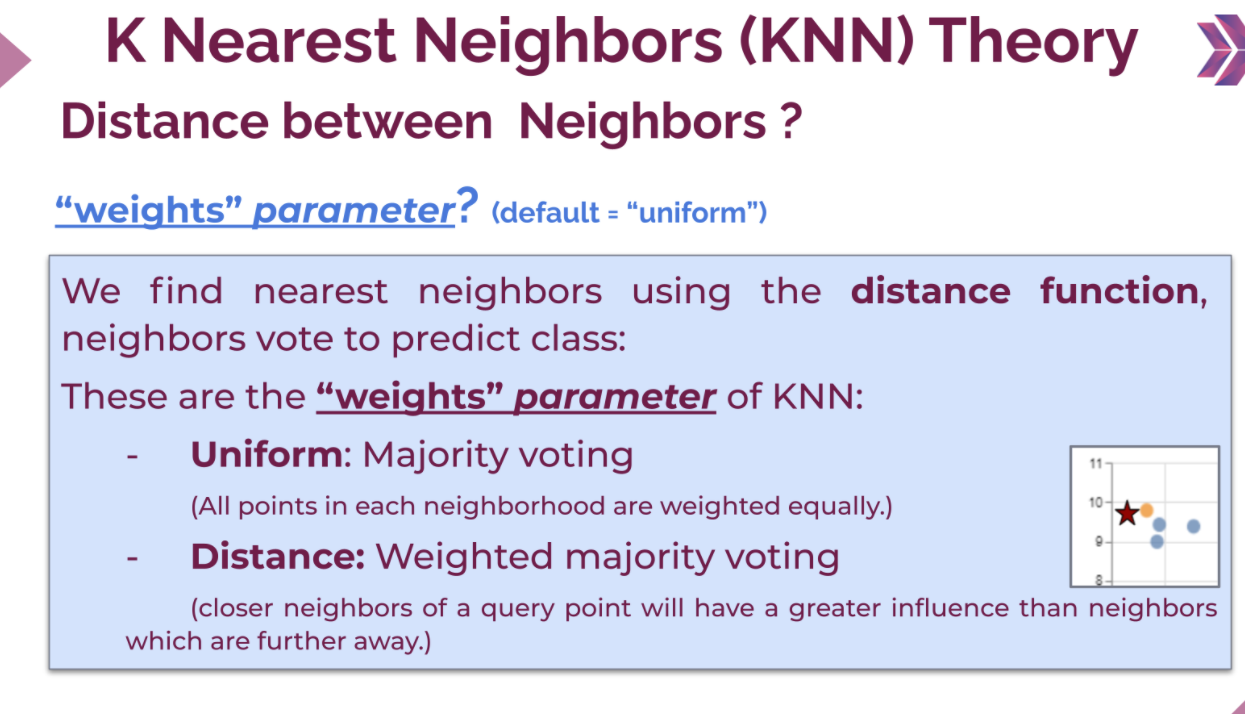

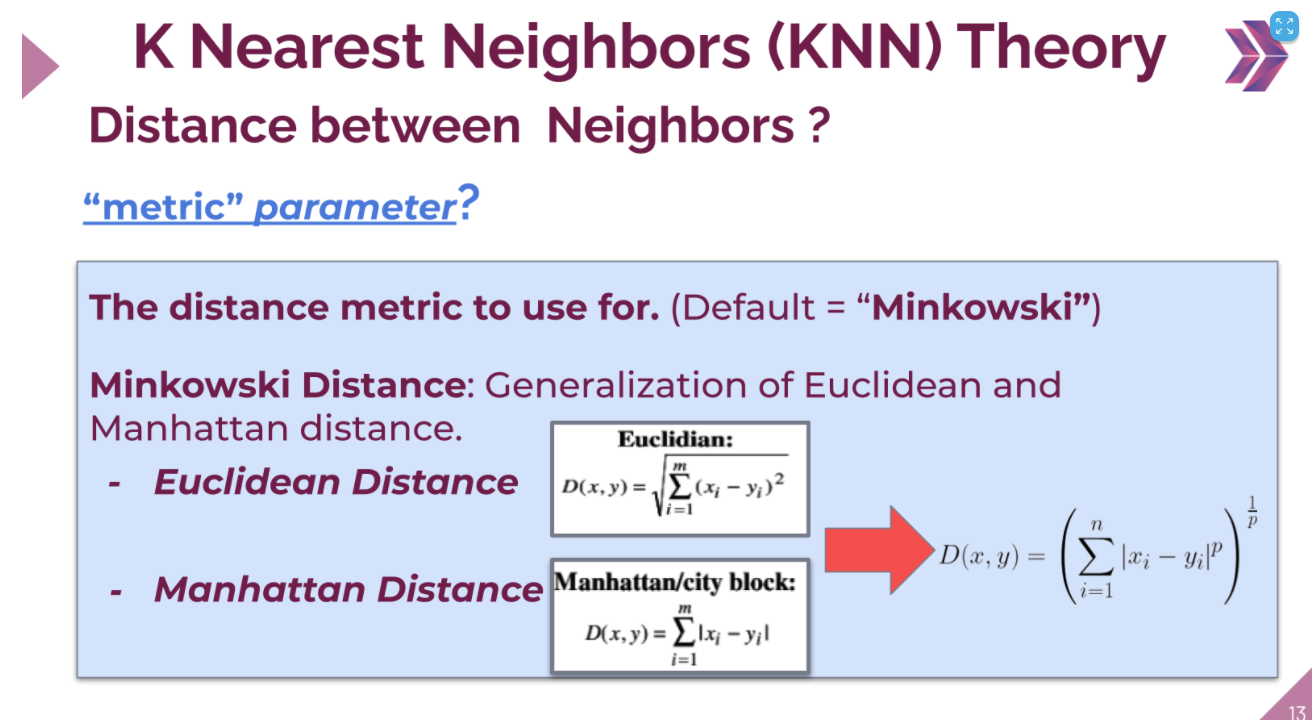

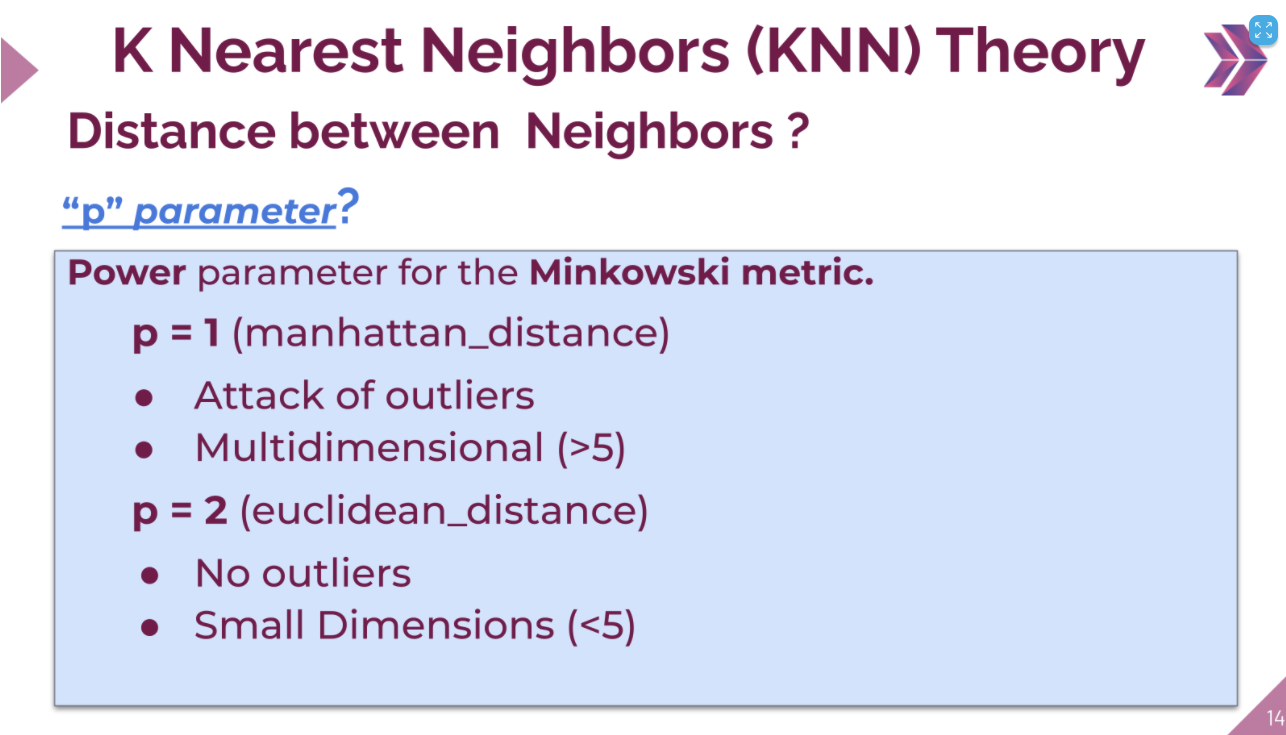

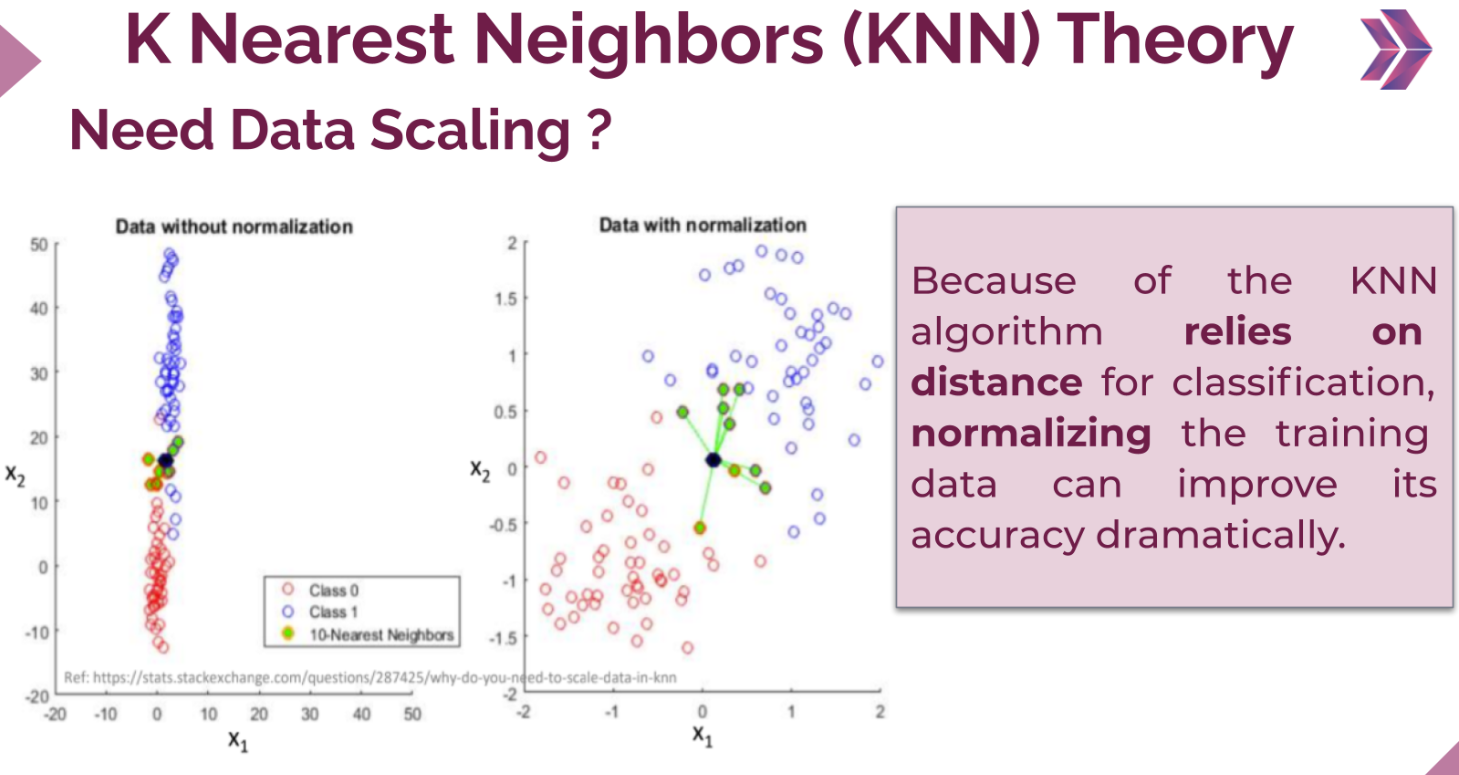

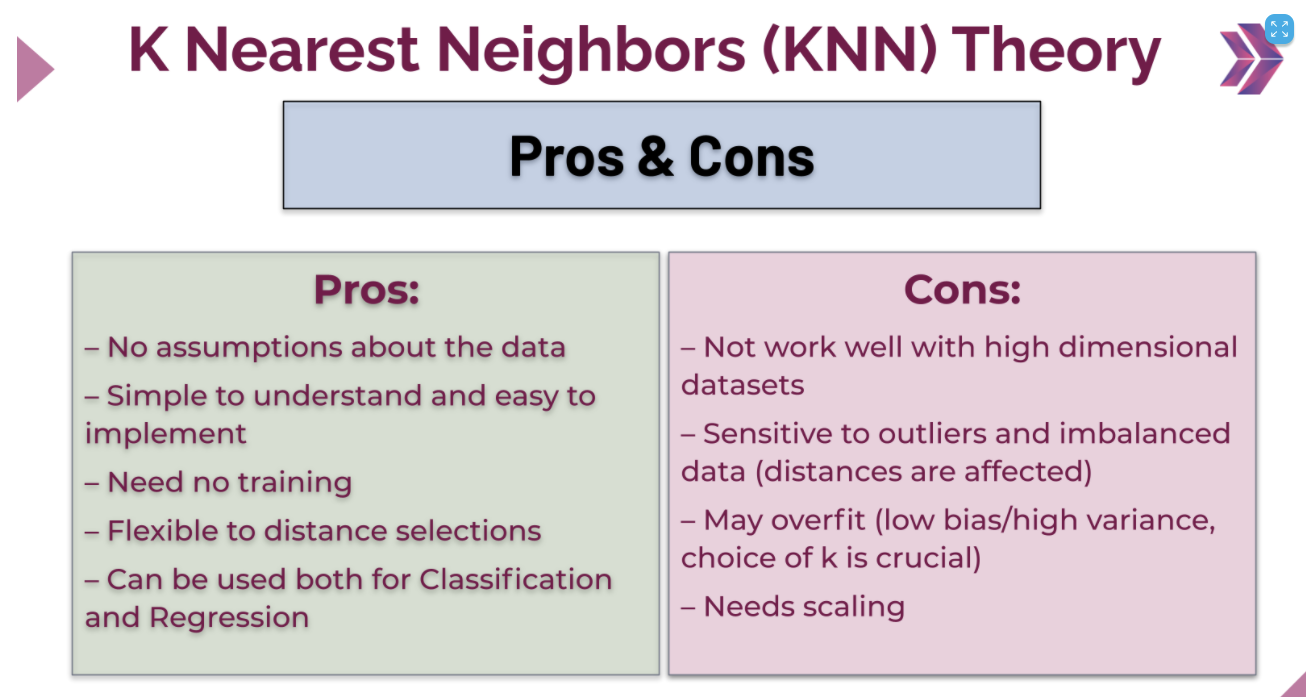

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [4]:
df.describe()

# mean ve std. baktığımızda outlier lardan söz edemeyiz. 

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [4]:
df["Cancer Present"].value_counts()

0    1500
1    1500
Name: Cancer Present, dtype: int64

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

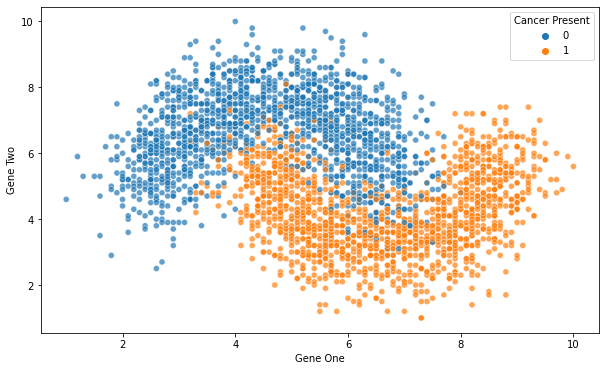

In [6]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)

(4.0, 8.0)

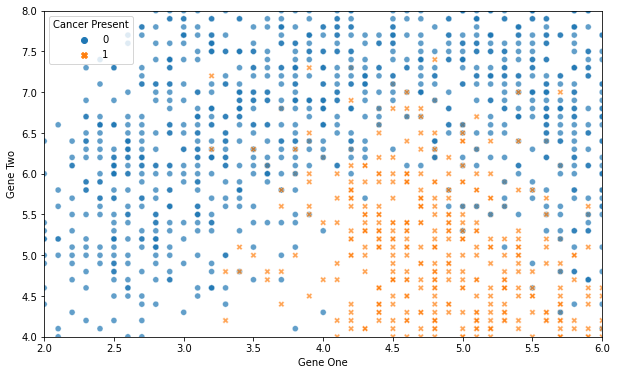

In [7]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7, style= "Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8)

# ortadaki target verilerinin geçişken olduğu bölümü daha iyi görebilmek için limitlerle oynadık.

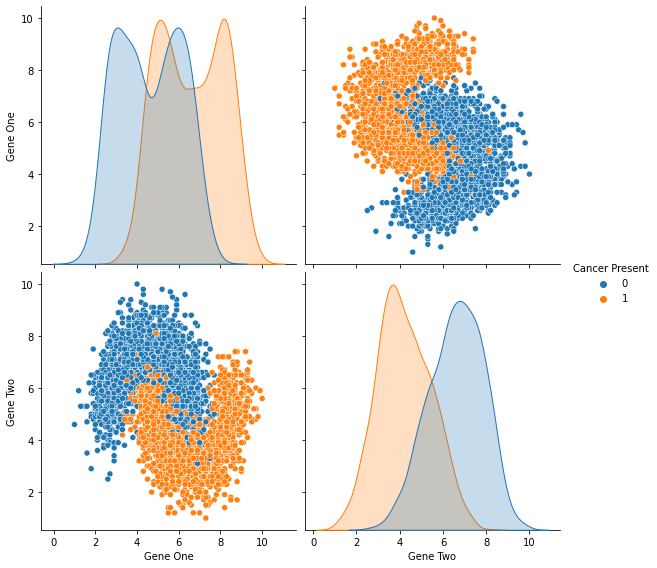

In [8]:
sns.pairplot(data=df, hue="Cancer Present", height=4, aspect =1)

<AxesSubplot:xlabel='Cancer Present', ylabel='Gene One'>

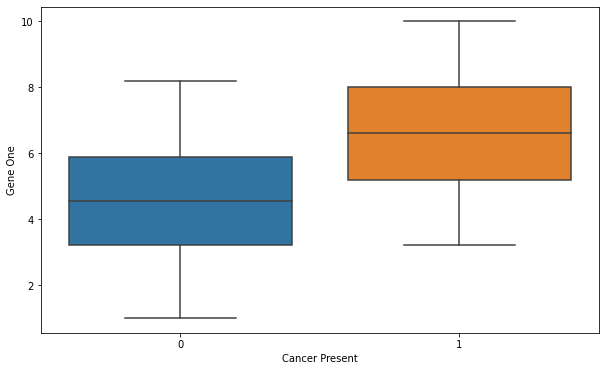

In [9]:
sns.boxplot(x= 'Cancer Present', y = 'Gene One', data=df)

<AxesSubplot:xlabel='Cancer Present', ylabel='Gene Two'>

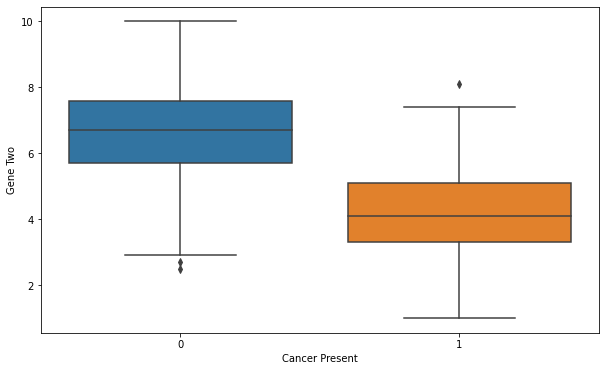

In [10]:
sns.boxplot(x= 'Cancer Present', y = 'Gene Two', data=df)

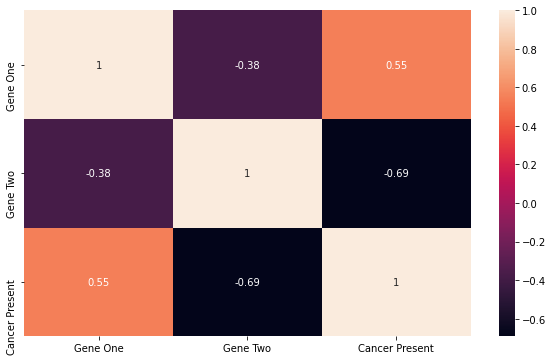

In [6]:
sns.heatmap(df.corr(), annot=True);

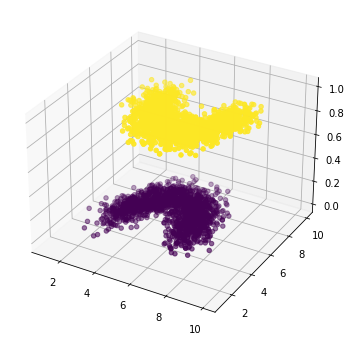

In [7]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present']);

## Train|Test Split and Scaling Data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
scaler = StandardScaler()

# KNN scale isteyen bir model olduğu için burda mutlaka scale ediyorum.

In [12]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Modelling

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

# default olarak neighbor sayısı zaten 5'tir.

In [15]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn_model.predict(scaled_X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [19]:
y_pred_proba = knn_model.predict_proba(scaled_X_test)

In [20]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
895,0.4,0.6
896,1.0,0.0
897,0.0,1.0
898,0.0,1.0


In [21]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [22]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
157,1,1,1.0,0.0
1244,1,1,1.0,0.0
783,0,0,0.0,1.0
347,0,0,0.0,1.0
1345,0,0,0.2,0.8
1010,0,0,0.0,1.0
1149,1,1,0.8,0.2
2681,1,1,0.6,0.4
2746,1,1,1.0,0.0
177,1,1,0.8,0.2


## Model Performance on Classification Tasks

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [24]:
confusion_matrix(y_test, y_pred)

array([[439,  31],
       [ 34, 396]], dtype=int64)

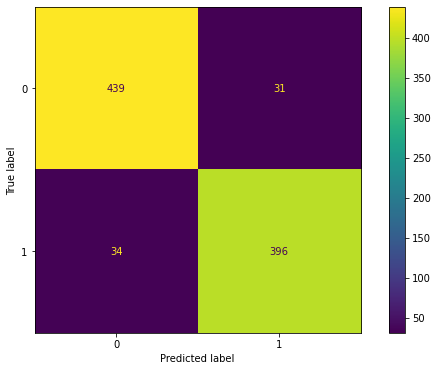

In [25]:
plot_confusion_matrix(knn_model, scaled_X_test, y_test);

In [26]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



## Elbow Method for Choosing Reasonable K Values

In [27]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [29]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

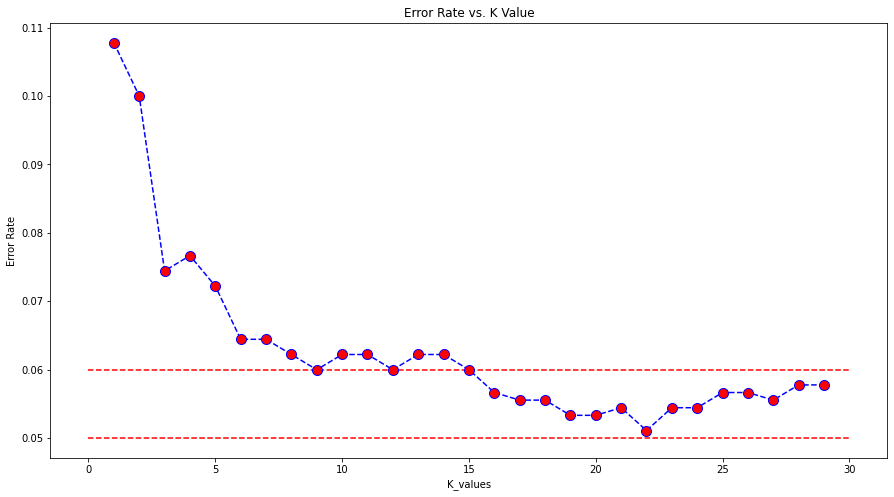

In [31]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.05, xmin = 0, xmax = 30, colors= 'r', linestyles="--")  # y'nin minimum olduğu iki değer için 0.05 ve 0.06) çizgi çizdirdik.
plt.hlines(y=0.06, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

# x değeri olarak 1 den 30 kadar range yaptım. y olarak da test error rates leri atadım.

# amacım minimum error skorunu veren k sayısını bulmak.

# genel amacımız minimum complexcity ile maksimum verimi almaktır. o yüzden k sayısını optimum olarak belirlemeliyim.

## Scores by Various K Values

In [32]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=1


[[420  50]
 [ 47 383]]


              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [33]:
# NOW WITH K=22
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=22')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=22


[[452  18]
 [ 28 402]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.96      0.93      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



In [ ]:
burda (yukarda) hatalarım yarı yarıya azaldı. şimdi de optimum k sayısına göre bakalım 

In [34]:
# NOW WITH K=9
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=9


[[445  25]
 [ 29 401]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



## Cross Validate For Optimal K Value

In [35]:
from sklearn.model_selection import cross_val_score, cross_validate

In [36]:
model = KNeighborsClassifier(n_neighbors=9) # cross val. için yeni bir model object'i tanımladık

scores = cross_validate(model, scaled_X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002007,0.011000,0.914286,0.923810,0.906542,0.915094
2,0.001997,0.008996,0.947619,0.944444,0.953271,0.948837
3,0.001003,0.013997,0.947619,0.970588,0.925234,0.947368
4,0.000996,0.007998,0.866667,0.876190,0.859813,0.867925
5,0.001001,0.009014,0.923810,0.909910,0.943925,0.926606
6,0.000998,0.008996,0.909524,0.915094,0.906542,0.910798
7,0.002028,0.007973,0.933333,0.911504,0.962617,0.936364
8,0.001999,0.007004,0.938095,0.927273,0.953271,0.940092
9,0.001004,0.009002,0.961905,0.980583,0.943925,0.961905
10,0.001999,0.011005,0.895238,0.869565,0.934579,0.900901


In [37]:
df_scores.mean()[2:]

test_accuracy     0.923810
test_precision    0.922896
test_recall       0.928972
test_f1           0.925589
dtype: float64

## Cross Validate for Label = 0

In [38]:
from sklearn.metrics import make_scorer

In [39]:
scoring = {'precision-0': make_scorer(precision_score,  pos_label=0),
           'recall-0': make_scorer(recall_score, pos_label =0),
           'f1-0': make_scorer(f1_score, pos_label = 0)}

# bu dict. yi aşağıda cross_validate() fonksiyonunun içinde scoring parametresine atayacağım.

In [40]:
model = KNeighborsClassifier(n_neighbors=9) # en iyi komşu sayısı ile modelimi sıfırladım.

scores = cross_validate(model, scaled_X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision-0,test_recall-0,test_f1-0
1,0.002002,0.012167,0.904762,0.922330,0.913462
2,0.001997,0.008996,0.950980,0.941748,0.946341
3,0.001992,0.007999,0.925926,0.970874,0.947867
4,0.001002,0.008998,0.857143,0.873786,0.865385
5,0.002009,0.008994,0.939394,0.902913,0.920792
6,0.002005,0.009002,0.903846,0.912621,0.908213
7,0.001003,0.010998,0.958763,0.902913,0.930000
8,0.001992,0.007999,0.950000,0.922330,0.935961
9,0.001005,0.007994,0.943925,0.980583,0.961905
10,0.002011,0.007997,0.926316,0.854369,0.888889


In [41]:
df_scores.mean()[2:]

test_precision-0    0.926106
test_recall-0       0.918447
test_f1-0           0.921881
dtype: float64

## Predict New Observation

In [42]:
new_observation = [[3.5, 4.3]] 

In [43]:
knn_model.predict(new_observation)

array([1], dtype=int64)

In [44]:
knn_model.predict_proba(new_observation)

array([[0.34482759, 0.65517241]])

In [46]:
#  modelimi eğitirken train setimi scale etmişti. Dolayısıyla yeni observationları da predict etmeden önce scale etmem gerekir!!

new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[-1.1393583 , -0.62176572]])

In [47]:
knn_model.predict(new_observation_scaled)

array([0], dtype=int64)

In [48]:
knn_model.predict_proba(new_observation_scaled)

array([[0.62068966, 0.37931034]])

## Gridsearch Method for Choosing Reasonable K Values

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
knn_grid = KNeighborsClassifier()

# KNeighborsClassifier() fonksiyonundaki parametrelerden en önemlisi n_neighbors dur. bununla mutlaka oynamak gerekir.

# p = 1 manhatten, p = 2 öklit. 

In [52]:
k_values= range(1,30)

In [53]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [54]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

# datam dengeli olduğu için skor için accuracy ye bakıyorum.

# girdiğim parametreleri 10 defa skorluyor ve en iyi parametreler hangileri ise bana onu döndürüyor.

In [55]:
knn_grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [56]:
knn_grid_model.best_params_

{'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}

In [57]:
# NOW WITH K=21
knn = KNeighborsClassifier(n_neighbors=21, p =1)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=21


[[447  23]
 [ 27 403]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       470
           1       0.95      0.94      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



## Evaluating ROC Curves and AUC

In [58]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

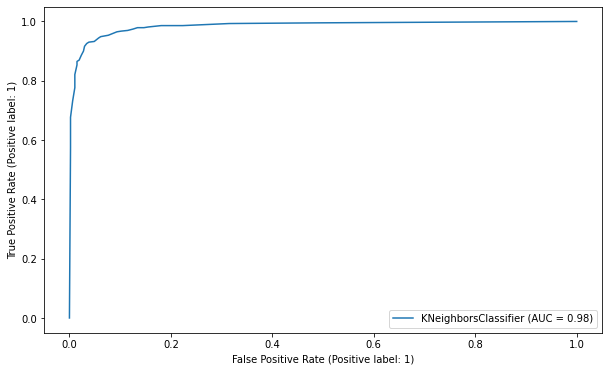

In [63]:
plot_roc_curve(knn_model, scaled_X_test, y_test)

In [64]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9670806531420088

## Final Model and Model Deployment

In [65]:
import pickle

In [66]:
scaler = StandardScaler()

In [67]:
scaler.fit(X)

StandardScaler()

In [68]:
X_scaled = scaler.transform(X)

In [70]:
final_knn_model = KNeighborsClassifier(n_neighbors=9)

In [71]:
pickle.dump(final_knn_model, open('knn_final.pkl', 'wb'))

In [72]:
pickle.dump(scaler, open('scaler_knn.pkl', 'wb'))

## Predict New Observations

In [73]:
loaded_scaler = pickle.load(open('scaler_knn.pkl', 'rb'))

In [74]:
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

In [75]:
X.columns

Index(['Gene One', 'Gene Two'], dtype='object')

In [76]:
X.describe()

,Gene One,Gene Two
count,3000.000000,3000.000000
mean,5.600133,5.410467
std,1.828388,1.729081
min,1.000000,1.000000
25%,4.300000,4.000000
50%,5.600000,5.400000
75%,6.900000,6.700000
max,10.000000,10.000000


In [77]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }

In [78]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [79]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[-2.51637037e+00, -2.55118325e+00],
       [-1.42232801e+00, -8.15868071e-01],
       [-7.11200471e-01, -8.15868071e-01],
       [-7.29361574e-05,  5.17895174e-02],
       [ 7.65756716e-01,  7.45915588e-01],
       [ 2.13330967e+00,  2.65476228e+00],
       [-1.96934919e+00,  1.49788550e+00],
       [ 2.18735536e-01, -2.55118325e+00]])

In [80]:
loaded_model.fit(X_scaled,y)

KNeighborsClassifier(n_neighbors=9)

In [81]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [82]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,Gene One,Gene Two,pred,pred_proba_1,pred_proba_0
0,1.0,1.0,0,0.000000,1.000000
1,3.0,4.0,0,0.111111,0.888889
2,4.3,4.0,1,1.000000,0.000000
3,5.6,5.5,0,0.222222,0.777778
4,7.0,6.7,0,0.000000,1.000000
5,9.5,10.0,1,0.666667,0.333333
6,2.0,8.0,0,0.000000,1.000000
7,6.0,1.0,1,1.000000,0.000000


## Pipeline K-Nearest Neighbors(KNN)

In [83]:
from sklearn.pipeline import Pipeline

In [84]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]


In [ ]:
istersen poly feature işlemini de başına ilave edebilirsin.

In [85]:
Pipeline(steps=operations)

# operations ile belirlenen stepleri benim yerime yap.

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [86]:
pipe_model = Pipeline(steps=operations)

In [88]:
pipe_model.fit(X_train, y_train)

# artık pipe_model.fit dediğim zaman benim için şunları yapıyor:
  # scaler.fit_transform(X_train) --> knn.fit(scaled_X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [89]:
y_pred = pipe_model.predict(X_test)
y_pred

# pipe_model.predict(X_test) benim için şunları yapıyor --> scaler.transform(X_test) --> knn.predict(scaled_X_test)

# predict edeceğim datayı (X_test) önce scale etmem gerekiyordu (modelimi train ederken X_train datamı scale ettiğim için)
# Pipeline, bu işlemleri sırasıyla yapıyor

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

## Model Performance

In [90]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

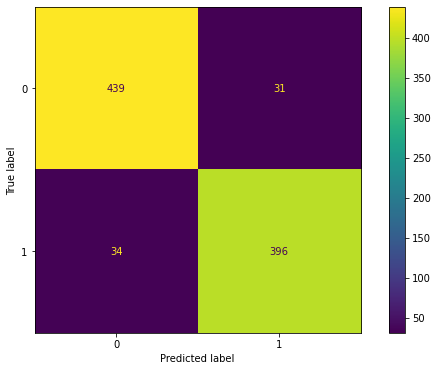

In [91]:
plot_confusion_matrix(pipe_model, X_test, y_test);

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



## Changing the parameters of the pipe_model

In [93]:
pipe_model.get_params()

# başlangıçtaki parametreleri görmek için. 

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [95]:
pipe_model.set_params(knn__n_neighbors= 9) # Euclidean

# başlangıçtaki parametreleri değiştirebilmek için.

# set_params() metodu kullanarak neighbors sayısını 9 yaptım.

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [96]:
pipe_model.get_params()

# get_params() metodu ile pipe_modelimin parametrelerine tekrar baktım. artık neighbors sayısının 9 olduğunu gördüm

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=9))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=9),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 9,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [97]:
pipe_model["scaler"]

# modelimde kullandığım scaler değeri nedir diye görmek için.

StandardScaler()

In [98]:
pipe_model["knn"]

# modelimde kullandığım model cinsi nedir diye görmek için.

KNeighborsClassifier(n_neighbors=9)

## GridSearch on Pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV

In [99]:
param_grid = {'knn__n_neighbors': range(1,30)} 

# buraya gireceğim isim get_params'ta geçtiği şekliyle olmalı.

In [100]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= 'f1')

In [103]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=9))]),
             param_grid={'knn__n_neighbors': range(1, 30)}, scoring='f1')

In [102]:
pipe_grid.best_params_

# GridSearch'ü bir de pipe metodunu kullandığımız "pipe_model" ile çalıştırdık. yine aynı 21 k sayısına ulaştık.

{'knn__n_neighbors': 21}

## Final pipe_model 

In [104]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9))]

# yukarda "pipe_model.set_params(knn__n_neighbors= 9) " komutu ile knn'yi 9 olarak atamıştık
   # dolayısıyla burada tekrar n_neighbors'u 9 olarak belirlemeseydik bile bu değeri 9 olarak alacaktı.

In [105]:
pipe_final = Pipeline(operations)

In [107]:
pipe_final.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

## Predict New Observations with pipe_model

In [108]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [109]:
predictions = pipe_final.predict(samples)
predictions

# modelimi scale edilmiş X değerleri ile eğitmiştim. bu yüzden sample datasının da scale edilip öyle predict edilmesi gerekir.
# pipeline (içine attığımız operations sayesinde) benim yerime sample datasını scale ederek predict işlemini yapıyor.

array([0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [110]:
predictions_proba = pipe_final.predict_proba(samples)
predictions_proba

array([[1.        , 0.        ],
       [0.88888889, 0.11111111],
       [0.        , 1.        ],
       [0.77777778, 0.22222222],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [111]:
samples["pred"] = predictions
samples["pred_proba"] = predictions_proba[:,1]
samples

,Gene One,Gene Two,pred,pred_proba
0,1.0,1.0,0,0.000000
1,3.0,4.0,0,0.111111
2,4.3,4.0,1,1.000000
3,5.6,5.5,0,0.222222
4,7.0,6.7,0,0.000000
5,9.5,10.0,1,0.666667
6,2.0,8.0,0,0.000000
7,6.0,1.0,1,1.000000


In [ ]:
THE END